In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv("sentiment_analysis.csv")

In [6]:
df.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram


In [4]:
df.tail()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
494,2015,10,18,night,"According to , a quarter of families under six...",negative,Twitter
495,2021,2,25,morning,the plan to not spend money is not going well,negative,Instagram
496,2022,5,30,noon,uploading all my bamboozle pictures of facebook,neutral,Facebook
497,2018,8,10,night,congratulations ! you guys finish a month ear...,positive,Twitter
498,2019,3,25,morning,"actually, I wish I was back in Tahoe. I miss...",negative,Instagram


In [5]:
df.sample(6)

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
298,2019,8,20,noon,"Morning! If I get to see it, I`ll let you kno...",neutral,Twitter
158,2023,6,1,morning,almost died. Laptop screen was set to 100% bri...,positive,Instagram
371,2023,1,19,night,I feel your pain. Mine is the same way,negative,Twitter
151,2021,2,10,night,"yeah I was thinking about that ,ahaha",positive,Facebook
18,2020,3,5,morning,"I'm come back home, my past job, its really go...",positive,Facebook
66,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter


In [6]:
df.columns

Index(['Year', 'Month', 'Day', 'Time of Tweet', 'text', 'sentiment',
       'Platform'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           499 non-null    int64 
 1   Month          499 non-null    int64 
 2   Day            499 non-null    int64 
 3   Time of Tweet  499 non-null    object
 4   text           499 non-null    object
 5   sentiment      499 non-null    object
 6   Platform       499 non-null    object
dtypes: int64(3), object(4)
memory usage: 27.4+ KB


In [8]:
df.dtypes

Year              int64
Month             int64
Day               int64
Time of Tweet    object
text             object
sentiment        object
Platform         object
dtype: object

In [9]:
df.shape

(499, 7)

In [10]:
df.isnull().sum()

Year             0
Month            0
Day              0
Time of Tweet    0
text             0
sentiment        0
Platform         0
dtype: int64

In [11]:
df['sentiment'].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [12]:
df['Time of Tweet'].unique()

array(['morning', 'noon', 'night'], dtype=object)

In [13]:
df['Platform'].unique()

array([' Twitter  ', ' Facebook ', 'Facebook', ' Instagram ', ' Twitter '],
      dtype=object)

# Data Visulization

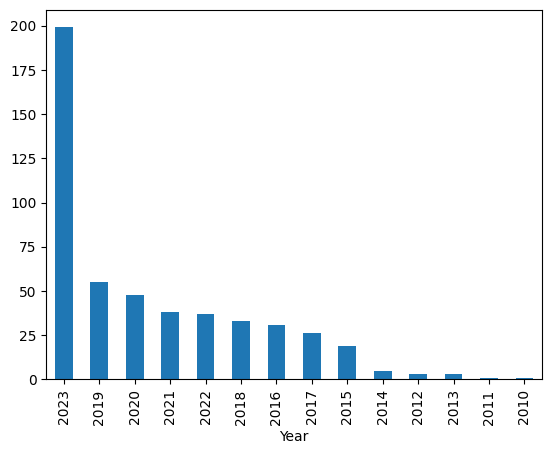

In [14]:
df.Year.value_counts().plot(kind='bar')
plt.show()

In [15]:
df.sentiment.value_counts()

sentiment
neutral     199
positive    166
negative    134
Name: count, dtype: int64

In [17]:
df.Platform.value_counts()

Platform
 Instagram     171
 Facebook      165
 Twitter        91
 Twitter        68
Facebook         4
Name: count, dtype: int64

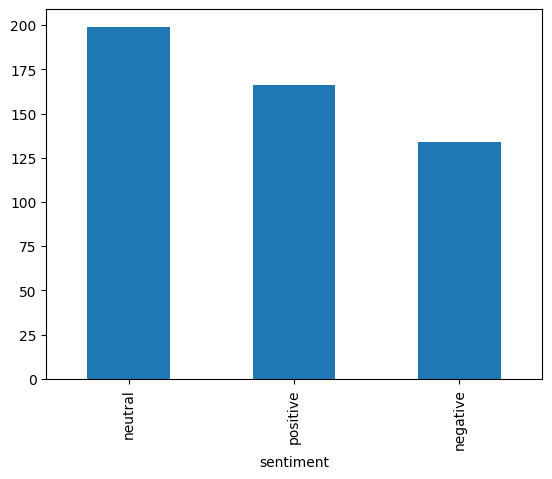

In [18]:
df.sentiment.value_counts().plot(kind='bar')
plt.show()

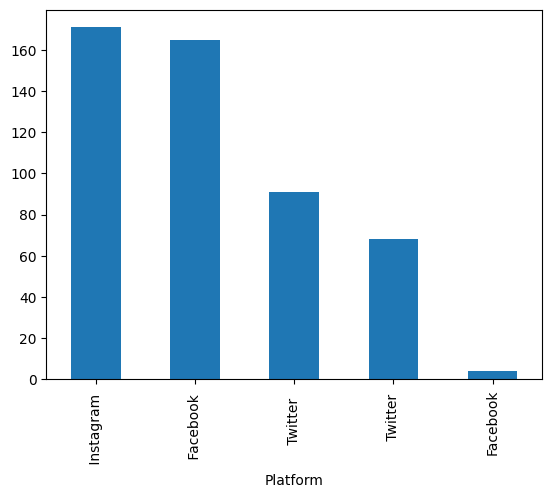

In [19]:
df.Platform.value_counts().plot(kind='bar')
plt.show()

In [20]:
def mapping(x):
    map = {
        'neutral':0,
        'positive':1,
        'negative':2
    }
    return map.get(x)

In [21]:
df['sentiment'] = df['sentiment'].apply(mapping)

In [22]:
df.sample(3)

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
430,2016,12,12,noon,Goodmorning,1,Twitter
243,2021,2,28,morning,Let me know how that turns out!!,0,Twitter
31,2023,1,18,noon,"I buy Sophie's world book, I'm really so happy",1,Twitter


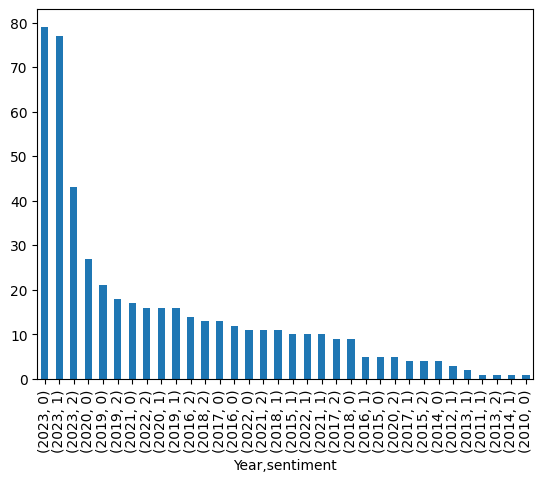

In [23]:
df.groupby('Year').sentiment.value_counts().sort_values(ascending = False).plot(kind = 'bar')
plt.show()

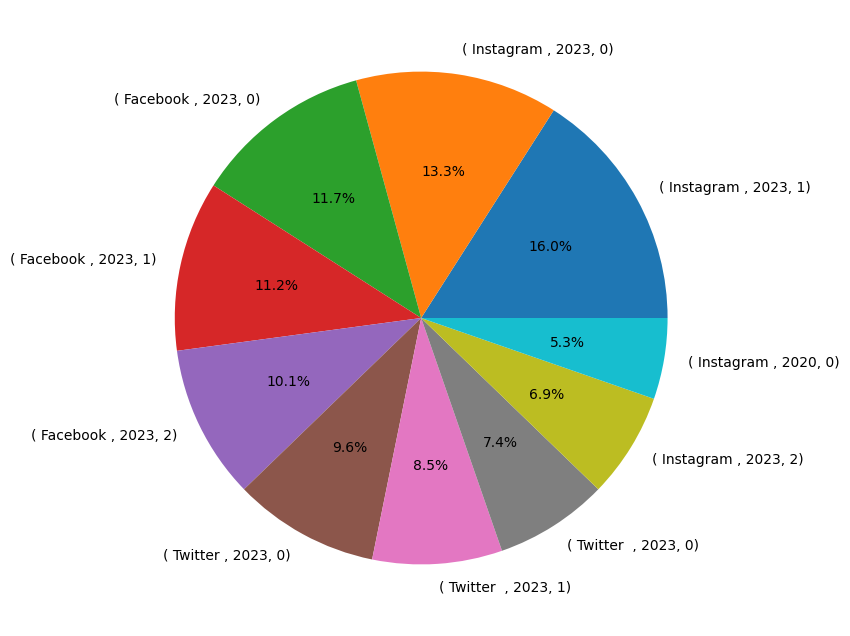

In [24]:
plt.figure(figsize=(8,8))
df.groupby(['Platform','Year']).sentiment.value_counts().sort_values(ascending = False).head(10).plot(kind = 'pie',autopct = '%1.1f%%',ylabel='')
plt.show()

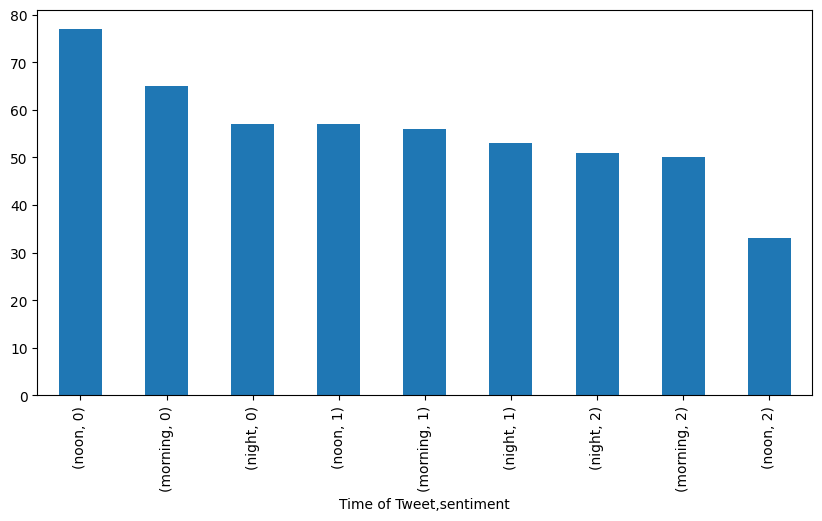

In [25]:
plt.figure(figsize=(10,5))
df.groupby('Time of Tweet').sentiment.value_counts().sort_values(ascending = False).plot(kind = 'bar')
plt.show()

# Data preprocessing

In [26]:
total_word_count = 0
for content in df['text']:
    total_word_count += sum(1 for _ in content.split())
print(total_word_count)

5732


In [27]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
ps = PorterStemmer()

In [29]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [ps.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = " ".join(stemmed_content)
    return stemmed_content

In [30]:
df['text'] = df['text'].apply(stemming)

In [31]:
total_word_count = 0
for content in df['text']:
    total_word_count += sum(1 for _ in content.split())
print(total_word_count)

3064


# Data spliting 

In [33]:
from sklearn.model_selection import train_test_split

In [35]:
x=df['text']

In [37]:
x.to_frame()

,text
0,great day look like dream
1,feel sorri miss sea beach
2,angri
3,attend class listen teacher read slide nonsenc
4,want go let go
...,...
494,accord quarter famili six live poverti
495,plan spend money go well
496,upload bamboozl pictur facebook
497,congratul guy finish month earli booo


In [38]:
y=df['sentiment']

In [39]:
y.to_frame()

,sentiment
0,1
1,1
2,2
3,2
4,2
...,...
494,2
495,2
496,0
497,1


In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [41]:
x_train.to_frame()

,text
56,bad headech need
227,happi mother day mother world
280,get readi week nice today stuck insid work
486,back soon need run shop cut grass
220,error red life blue love rose lip babi
...,...
106,car happi big big dent boot hope theyr go writ...
270,shirt dinner need ask actual vill
348,comput hopeless everyth els
435,waterfront anymor faccia luna clarendon


In [42]:
x_test.to_frame()

,text
460,peopl pencil sharp sharpen pencil philosophi
73,soooo high
231,screw review thought wolverin awesom enough do...
175,hell yeah
237,alway want go oz
...,...
247,sleep accept appolog
384,make face get home mom watch soap
19,never fall love found
321,ohh tooth hurt ohh im sad hurt


In [43]:
y_train.to_frame()

,sentiment
56,2
227,1
280,1
486,0
220,1
...,...
106,0
270,0
348,2
435,2


In [44]:
y_test.to_frame()

,sentiment
460,0
73,0
231,1
175,0
237,0
...,...
247,2
384,0
19,1
321,2


In [45]:
vc = TfidfVectorizer()

In [46]:
x_train = vc.fit_transform(x_train)
x_test = vc.transform(x_test)

In [48]:
x_train

<399x1028 sparse matrix of type '<class 'numpy.float64'>'
	with 2428 stored elements in Compressed Sparse Row format>

In [49]:
x_test

<100x1028 sparse matrix of type '<class 'numpy.float64'>'
	with 398 stored elements in Compressed Sparse Row format>

# Model selection

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
lor=LogisticRegression()

In [57]:
lor.fit(x_train,y_train)

LogisticRegression()

In [58]:
lor.score(x_test,y_test)

0.65

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
dt=DecisionTreeClassifier()

In [61]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [62]:
dt.score(x_test,y_test)

0.62

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rf=RandomForestClassifier()

In [66]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [68]:
rf.score(x_test,y_test)

0.66

In [69]:
from sklearn.svm import SVC

In [70]:
s=SVC()

In [71]:
s.fit(x_train,y_train)

SVC()

In [72]:
s.score(x_test,y_test)

0.6

# Model Comaprision

In [73]:
model=['Logistic Regression','DecisoinTree','RandomForest','SVM']
acc=[0.65,0.62,0.66,0.6]

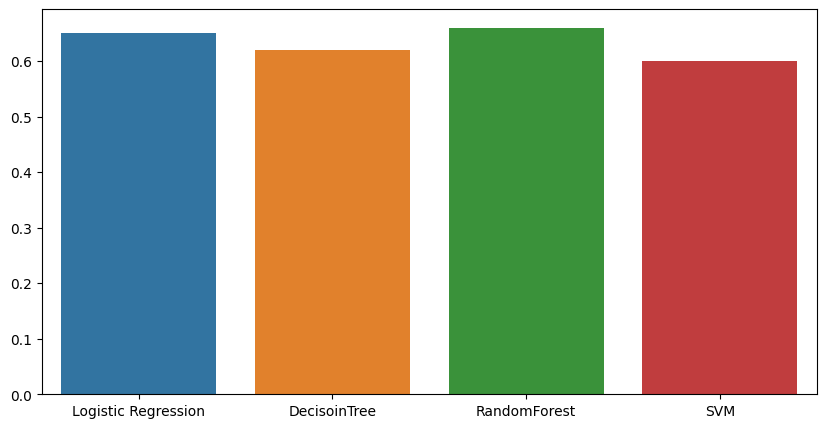

In [74]:
plt.figure(figsize=(10,5))
sns.barplot(x=model,y=acc)
plt.show()

# Prediction

In [77]:
def val_to_category(val):
    category_map = {
       0:'neutral',
        1:'positive',
        2:'negative'
     }
    return category_map.get(val,-1)

In [78]:
def make_predictions(text):
    text = stemming(text)
    text = vc.transform([text])
    val = rf.predict(text)
    val = val_to_category(int(val[0]))
    print("sentiment is : ",val)

In [79]:
make_predictions('it is not an good.')

sentiment is :  neutral


In [80]:
make_predictions('it is an good product.')

sentiment is :  neutral


In [81]:
make_predictions('i am really very happy.')

sentiment is :  positive


In [82]:
make_predictions('shit,it is very bed for all of us.')

sentiment is :  neutral
